In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
df['trg'] = iris.target

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),trg
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df['flname'] =df.trg.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),trg,flname
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df0 = df[df.trg==0]
df1 = df[df.trg==1]
df2 = df[df.trg==2]

In [9]:
import matplotlib.pyplot as mp
%matplotlib inline

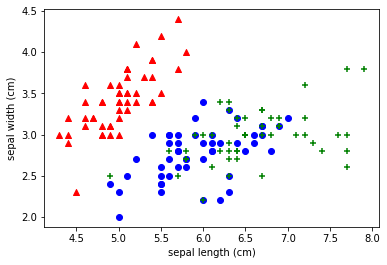

In [10]:
mp.xlabel('sepal length (cm)')
mp.ylabel('sepal width (cm)')
mp.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color='red',marker='^')
mp.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='blue',marker='o')
mp.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'], color='green',marker='+')

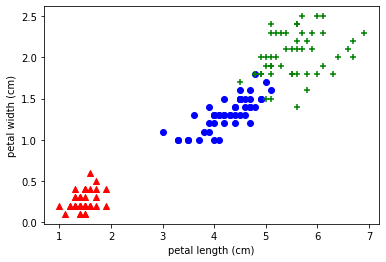

In [11]:
mp.xlabel('petal length (cm)')
mp.ylabel('petal width (cm)')
mp.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='red',marker='^')
mp.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='blue',marker='o')
mp.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color='green',marker='+')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = df.drop(['trg','flname'], axis='columns')
y = df.trg

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.7)

In [15]:
from sklearn.svm import SVC
svm = SVC() #enter Shift-Tab to see the function arguments

In [16]:
svm.fit(x_test,y_test)

SVC()

In [17]:
svm.score(x_test, y_test)

0.9619047619047619

In [18]:
from sklearn.metrics import classification_report
y_prad = svm.predict(x_test)
print(classification_report(y_test, y_prad))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.90      1.00      0.95        35
           2       1.00      0.89      0.94        36

    accuracy                           0.96       105
   macro avg       0.97      0.96      0.96       105
weighted avg       0.97      0.96      0.96       105

